In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
ox.__version__

C:\Users\think\anaconda3\envs\ox\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))
C:\Users\think\anaconda3\envs\ox\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


'1.1.2'

In [2]:
ox.settings.use_cache = True

# 下载步行数据

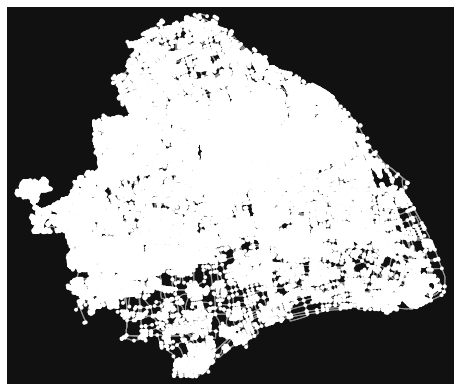

In [3]:
# 下载一个城市的街道网络模型，然后可视化它

SH = ox.graph_from_place("Shanghai, China", network_type="walk")
fig, ax = ox.plot_graph(SH)

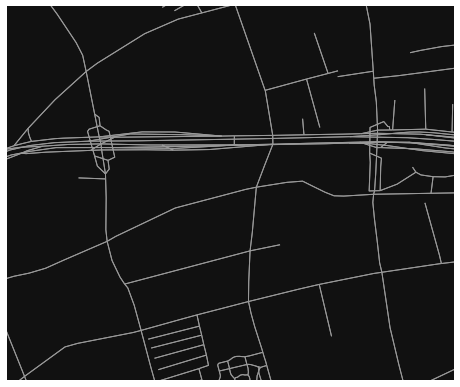

In [4]:
fig, ax = ox.plot_graph(SH,node_size=0,bbox=(31.22854585594,31.221022636447476,121.46050930023192,121.44999504089354))

# 导出空间数据，方便后面做数据的拼合

In [5]:
type(SH)

networkx.classes.multidigraph.MultiDiGraph

In [6]:
SHG = ox.utils_graph.get_undirected(SH)

In [7]:
type(SHG)

networkx.classes.multigraph.MultiGraph

In [ ]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(SH)
gdf_nodes.head()

## 处理node

In [ ]:
gdf_nodes = gdf_nodes[['y','x','geometry']]

In [ ]:
gdf_nodes.head()

In [ ]:
gdf_nodes['label'] = 'walk_node'

In [ ]:
gdf_nodes.head()

In [ ]:
gdf_nodes.to_file('./SHANGHAI/osm_shanghai_walk/gdf_nodes.geojson')

## 处理edges

In [ ]:
gdf_edges.head(1)

In [ ]:
gdf_edges = gdf_edges[['length','geometry']]

In [ ]:
gdf_edges.head()

In [ ]:
gdf_edges['label'] = 'walk_edge'

In [ ]:
gdf_edges.head()

In [ ]:
gdf_edges['wkt'] = gdf_edges['geometry'].apply(lambda x:x.wkt) # 存一个线路的wkt

In [ ]:
gdf_edges.head()

In [ ]:
gdf_edges.to_file('./SHANGHAI/osm_shanghai_walk/gdf_edges.geojson')